# Data Manipulation in Python (CS2006 P2)

On the 12th of November 2014, the European Space Agency lander Philae made the first ever soft landing of a spacecraft on the surface of a comet, 67P/Churyumov-Gerasimenko, having been carried there by the probe Rosetta. The news of the acheivement was disseminated through various social media platforms over the following days and weeks, including Twitter. This notebook analyses data independently gathered from Twitter to track the volume and nature of user activity related to the landing over the period of 3 weeks after the landing.

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt;
import math
import numpy as np

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import plotly.graph_objs as go
import operator
from collections import *

from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv("../data/CometLanding.csv",encoding="UTF-8")

In [3]:
len(df)

77319

In [4]:
df.drop_duplicates(['id_str'],inplace = True)

In [5]:
numTweets = len(df)

The raw data contained some duplicate tweets, which were removed, and the number of total remaining unique tweets is displayed below: 

In [6]:
df = df[df['text'].notnull()]

The number of unique users is displayed below:

In [7]:
len(df['from_user'].unique())

50195

<h1> Language

The following section of the notebook looks at the different languages that appear throughout the set. This sections displays all of the different languages used throughout the dataset, along with a pie-chart displaying what share, the most used languages, make up in the dataset.

In [8]:
language = df.groupby('user_lang')

In [9]:
language.size()

user_lang
ar           428
bg             1
ca           309
cs            42
da            89
de          2916
el            29
en         52316
en-AU          1
en-GB         23
en-gb       1972
es          7540
es-MX          2
eu            62
fa             2
fi           108
fil           10
fr          3313
gl            36
he             2
hi             2
hu            41
id            66
it          2664
ja          1514
ko            98
msa            1
nb             1
nl           838
no            36
pl           157
pt           508
pt-PT          1
ro             8
ru           794
sv           126
th            57
tr           761
uk            43
ur             1
vi             1
xx-lc         24
zh-CN          6
zh-Hans        6
zh-cn        285
zh-tw         27
dtype: int64

In [10]:
languages = []


for index, row in df.iterrows():
        text = (row['user_lang'])
        languages.append(text)

        
languageCount = {}

for lang in languages:
    if lang not in languageCount:
        languageCount[lang] = 1
    else:
        counter = languageCount.get(lang,'none')
        languageCount.update({lang: counter+1})

In [34]:
topLangs = sorted(languageCount.items(), key=operator.itemgetter(1),reverse=True)

In [11]:
#Gets the top 4 languages
topLanguage = topLangs[0][0]
topLanguageNum = topLangs[0][1]
    
secondLanguage = topLangs[1][0]
secondLanguageNum = topLangs[1][1]
    
thirdLanguage = topLangs[2][0]
thirdLanguageNum = topLangs[2][1]

fourthLanguage = topLangs[3][0]
fourthLanguageNum = topLangs[3][1]

totalLanguage = sum(languageCount.values())
otherLanguageNum = (totalLanguage-(topLanguageNum+secondLanguageNum+thirdLanguageNum+fourthLanguageNum))

In [12]:
fig = {
    'data': [{'labels': [topLanguage,secondLanguage,thirdLanguage,fourthLanguage," \"Other\'"],
              'values': [topLanguageNum,secondLanguageNum,thirdLanguageNum,fourthLanguageNum,otherLanguageNum],
              'type': 'pie'}],
    'layout': {'title': 'Language share'}
     }

iplot(fig)

The above pie chart shows the share each of language has on the tweets in the dataset. The chart clearly shows that english was the most used language taking over 2/3 of the set with 67.7% of the tweets in the set being written in english. This would be as expected as the comet launch was a eurpoean launch and english is the most spoken language in europe. This then shows that english would be the most used language as the majority of people who would be tweeting about the comet landing. Having english as the most used language would also be expected due to people from the US tweeting about the landing. users in america would be thought to be tweeting about the event due to many americans having an interest in space landings and probes, this would then increase the number of tweets being sent in english. 

The next three popular languages are Spanish, French and German, this would also be expected to be the case due to the landing mission being european. This means that people in those countrys having a specific interest in the landing due to their country having something to do with the landing. 

<h1>General Tweet Data

The following section will outline some of the more general aspects of the dataset. It highlights the total number of Tweets, Replies and Retweets and displays these values in a graph to show how the dataset is made up. 

In [13]:
print("Total number of Tweets: " + str(numTweets))

Total number of Tweets: 77268


In [14]:
dfNoRT = df[~df.text.str.startswith('RT', na=False)]

In [15]:
numReTweets = numTweets - len(dfNoRT) 

In [16]:
print("Total number of retweets: " + str(numReTweets))

Total number of retweets: 59999


In [17]:
dfReplies = df
numReplies = 0


for index, row in dfReplies.iterrows():
        text = (row['in_reply_to_screen_name'])
        if(not pd.isnull(text)):
            numReplies +=1

In [18]:
print("Total number of replies: " + str(numReplies))

Total number of replies: 1723


In [19]:
numTweets = numTweets-(numReTweets+numReplies)
data = [go.Bar(x=['Tweets', 'Retweets', 'Replies'],y=[numTweets,numReTweets,numReplies])]
layout = go.Layout(
    title='Number of Retweets, Replies and Tweets',
    yaxis=dict(
        title='Usage',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

The above graph shows the total number of unique Tweets that were in the data set. The graph then highlights how many of those tweets are Retweets and how many are replies to other tweets. As can be clearly seen from the graph the majority of the dataset is made up of Retweets with over 59 thousand Retweets being present. The set also includes a number of replies to tweets, however, when the amount of replies is compared to the number of Retweets it shows how many more Retweets there are over replies. This is shown with there only being 1723 replies in the set compared with the over 59 thousand Retweets. 

One of the main reaons for this mass difference in the number of Retweets to replies is the nature of what each of them actually do. Retweeting a tweet is more designed to share that perticular tweet with your followers as it may be something interesting or something you agree with. Whereas a reply is used for the more conversational aspect of twitter it is there to add a response or to add more information to a tweet and in some cases it can be used as a convorsation tool between people. 

Another possible reason for Retweets taking up a larger amount of the dataset over replies is that they are mush easier to utilise than replies. When a user goes to Retweet a tweet then they can simply just click Retweet which will then share this tweet with their followers. Whereas with a reply more thought must be put into the process as the actual content of the reply must be thought of and written out. This may be one of the reasons for Retweets being more prominent as simply they are quicker and easier to use. 

<h1>Hashtags

This section of the notebook looks at the different hashtags which are present throughout the dataset. Highlighted is the most used hashtags with all of the hashtags which have been used over 150 times are displayed, a word cloud has also been created to display the different hashtags excluding the main hashtag '#CometLanding'. Finally a bar graph has been made to visually show how many times each of the top four hashtags have been used and how they compare to each other. 

In [20]:
import re
hashtags = []
for index, row in dfNoRT.iterrows():
    text = (row['text'].split(" "))       
    for token in text:
        re.sub('[\W_]', '', token)
        if token.startswith('#'):
            hashtags.append(str(token))

In [21]:
hashtagCount = {}

for hashtag in hashtags:
    if hashtag not in hashtagCount:
        hashtagCount[hashtag] = 1
    else:
        counter = hashtagCount.get(hashtag,'none')
        hashtagCount.update({hashtag: counter+1})
        
for key,val in hashtagCount.items():
    if val>150:
        print (repr(key) + "=>" + repr(val))
    


'#cometlanding'=>1834
'#CometLanding'=>12741
'#ESA'=>194
'#Rosetta'=>1471
'#Philae'=>734
'#CometLanding:'=>161
'#rosettamission'=>169
'#Cometlanding'=>165
'#67P'=>400
'#CometLanding.'=>244
'#rosetta'=>178
'#WishKoSaPasko'=>929
'#HappyBirthdaySandaraPark'=>928


In [22]:
topHashtags = sorted(hashtagCount.items(), key=operator.itemgetter(1),reverse=True)    

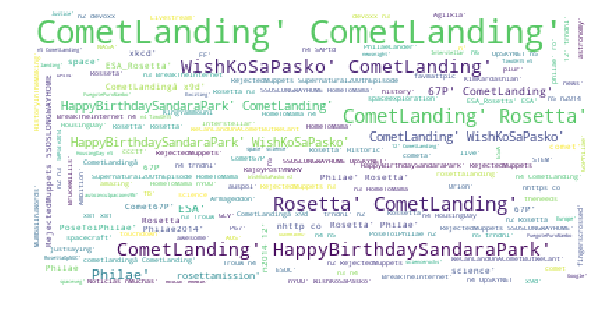

In [23]:
words = []

for key,val in hashtagCount.items():
    words.append(key)
    
words = [e[1:] for e in words]
stopwords = set(STOPWORDS)
stopwords.add("CometLanding")


wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=30000,max_font_size=40, random_state=42).generate(str(hashtags))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
topHashtags = sorted(hashtagCount.items(), key=operator.itemgetter(1),reverse=True)

In [25]:
#Gets the top 4 applications
topHash = topHashtags[0][0]
topHashNum = topHashtags[0][1]
    
secondHash = topHashtags[1][0]
secondHashNum = topHashtags[1][1]
    
thirdHash = topHashtags[2][0]
thirdHashNum = topHashtags[2][1]

fourthHash = topHashtags[3][0]
fourthHashNum = topHashtags[3][1]


In [26]:
data = [go.Bar(y=[topHashNum, secondHashNum, thirdHashNum,fourthHashNum],x=[topHash, secondHash,thirdHash,fourthHash])]
layout = go.Layout(
    title='Number of top Hashtags',
    yaxis=dict(
        title='Tweets',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

The above chart shows the number of times each of the top four hashtags were used. As can be seen from the chart the top three hashtags directly relate to the Comet Landing. This does not come as a surprise as a large portion of the data set contains tweets about the Comet landing so it would make sense for users who are tweeting about the Comet Landing to include hashtags relating to it. Hashtags are a way for users to link their tweets into topics in which other users are talking about. This then means that when a user looks at a particular hashtag they will be able to see all of the tweets which have used the hashtag, which then allows users to see what different people have thought about the topic in question. This then shows why it would make sense for users who are tweeting about the Comet Landing to include '#CometLanding' in their tweet so users who are looking at tweets about the Comet Landing can see what the users sending the tweets are saying. 

<h1>Applications

This section of the notebook examines the different applications which were used in the dataset to send tweets. A pie-chart has been created to highlight which devices were used to send the tweets and what percentage of tweets were sent from that application.

In [27]:
dfSource = df
import re
items = []
for index, row in dfSource.iterrows():
    text = (row['source'])
    for token in str(text):
        if token.endswith('>'):
            split1 = text.split("</a>")
            split2 = str(split1).split(">")
            split2 = str(split2).split(",")
            items.append(str(split2[1]))
            
appCount = {}

for device in items:
    if device not in appCount:
        appCount[device] = 1
    else:
        counter = appCount.get(device,'none')
        appCount.update({device: counter+1})

In [28]:
topApplications = sorted(appCount.items(), key=operator.itemgetter(1),reverse=True)
#Gets the top 4 applications
topApplication = topApplications[0][0]
topApplicationNum = topApplications[0][1]
    
secondApplication = topApplications[1][0]
secondApplicationNum = topApplications[1][1]
    
thirdApplication = topApplications[2][0]
thirdApplicationNum = topApplications[2][1]

fourthApplication = topApplications[3][0]
fourthApplicationNum = topApplications[3][1]

totalApplications = sum(appCount.values())
otherApplicationNum = (totalApplications-(topApplicationNum+secondApplicationNum+thirdApplicationNum+fourthApplicationNum))


In [29]:
fig = {
    'data': [{'labels': [topApplication,secondApplication,thirdApplication,fourthApplication," \"Other\'"],
              'values': [topApplicationNum,secondApplicationNum,thirdApplicationNum,fourthApplicationNum,otherApplicationNum],
              'type': 'pie'}],
    'layout': {'title': 'Application share of tweets'}
     }

iplot(fig)

The above chart shows the top 4 applicaions which were used to used to send tweets in the dataset. The chart also shows what percentage of other applications were used to send tweets. As can be seen from the chart above the majority of tweets were sent from the "Twitter Web Client" as that was used to send 36.1% of tweets used in the set. The next two most popular applications used were mobile applications as "Twitter for iPhone" has 17.8% of the tweets and "Twitter for Android" having 16.5%. These figures show an interesting point as although the web application had overall more than all of the other applications, if you were to combine the two mobiles applications it would come out at 34.3% just under the 36.1% of the web application. 

This shows that mobile applcations were infact very close to being the most used application for sending tweets in the set. It could also be agruged that mobile applications could have sent the most tweets as other mobile applications such as "Tweetbot for iOS" would be stored in the other section of the chart meaning that all considered it is no longer the case that traditional means such as web applications on computers will be the most used applications when it comes to social media. 

<h1>Dates

In this section of the notebook it looks at how the number of tweets sent changed between the days in the dataset. The section looks at the number of tweets sent on each of the different days and then this is displayed in a bar graph. Finally this information is analysed to see what reasons there might be for some days having a higher number of tweets than others. 

In [30]:
dfSource = df
import re
dates = []
for index, row in dfSource.iterrows():
    text = (row['created_at'])
    dates.append(text[0:10])

In [31]:
dateCount = {}
counter =0

for date in dates:
    if date not in dateCount:
        dateCount[date] = 1
    else:
        counter = dateCount.get(date,'none')
        dateCount.update({date: counter+1})

In [32]:
values =[]
dateKeys = []

for key,val in dateCount.items():
    values.append(val)
    dateKeys.append(str(key))
    print("Date: "+ str(key) + " Number of Tweets: " + str(val))
    


Date: Fri Dec 05 Number of Tweets: 87
Date: Thu Dec 04 Number of Tweets: 200
Date: Wed Dec 03 Number of Tweets: 311
Date: Tue Dec 02 Number of Tweets: 475
Date: Mon Dec 01 Number of Tweets: 603
Date: Sun Nov 30 Number of Tweets: 343
Date: Sat Nov 29 Number of Tweets: 428
Date: Fri Nov 28 Number of Tweets: 711
Date: Thu Nov 27 Number of Tweets: 497
Date: Wed Nov 26 Number of Tweets: 400
Date: Wed Nov 12 Number of Tweets: 73212


In [33]:
dateKeys.reverse()
values.reverse()
data = [go.Bar(x=dateKeys,y=values)]
layout = go.Layout(
    title='Number of Tweets per day',
    yaxis=dict(
        title='Tweets',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

The above graph shows the number of tweets which were sent on each day in the dataset. As can be seen from the graph the dataset contained a majority of tweets sent on 12th November, with 73 thousand tweets in the set being sent on that day. This would be some what expected as on that day was the lander reached its comet destination. As this was a day which had been greatly anticipated for nearly a decade it would be expected for the dataset to reflect this with the number of tweets. 

The graph also shows us that on 1st December there was a slight increase in the number of tweets over previous days about the Comet landing. One of the resons for this could be that on that day some of the first images from the comet were released which may have then caused people to begining tweeting about the pictures. However this increase is only a fraction to the amount of tweets which were sent on the actual comet landing.